In [1]:
import pandas as pd
from textwrap import wrap
#import seaborn
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML
from IPython.core.display import Image 
from IPython.display import display, HTML
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.mpl_style', 'default')
pd.set_option('display.notebook_repr_html', True)
import data_methods
import warnings
warnings.filterwarnings("ignore")
def _repr_latex_(self):
    return self.to_latex()
pd.DataFrame._repr_latex_ = _repr_latex_  

from music21 import *

%matplotlib inline
%pylab inline
matplotlib.pyplot.style.use('ggplot')


plt.rcParams["font.family"] = "arial"

/Users/jamiegabriel/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


Populating the interactive namespace from numpy and matplotlib


In [2]:
labels=["Number of phrases starting at this measure location",
        "Number of phrases ending at this measure location",
       ]
labels = [ '\n'.join(wrap(l, 20)) for l in labels ]

a5_font_size = 16
a5_y_label_offset = 1.08
a5_graph_fig_size = (10,8)

In [3]:
# EXTRA DATA PREP
def create_set_of_pitches_within_octave(data_row):
    ret_arr = []
    
    for i in range(0, len(data_row["Different pitches used in phrase"])):
        ret_arr.append(data_row["Different pitches used in phrase"][i] % 12)
    return len(list(set(ret_arr)))
all_melodies = pd.read_pickle('./data_frames/all_melodies_frame')
all_melodies["Percentage of unique pitches used in phrase"] = all_melodies["Number of pitches used in phrase"] / all_melodies['Number of notes in phrase'] * 100
all_melodies["Percentage of unique pitches used in phrase"] = all_melodies["Percentage of unique pitches used in phrase"].astype(int)
all_melodies["Percentage of unique durations used in phrase"] = all_melodies["Number of different durations used in phrase"] / all_melodies['Number of notes in phrase'] * 100
all_melodies["Percentage of unique durations used in phrase"] = all_melodies["Percentage of unique durations used in phrase"].astype(int)
all_melodies["Number of different pitch classes used in phrase minimized to one octave"] = all_melodies.apply(create_set_of_pitches_within_octave, axis=1)
# END DATA PREP

In [27]:
all_melodies["Performer collection"].value_counts()

Still Live                                                          216
Up For It                                                           174
Standards, Vol. 1                                                   121
Standards Live                                                      78 
Whisper Not                                                         71 
Tokyo 96                                                            55 
Keith Jarrett At The Blue Note, The Complete Recordings (Vol. 3)    51 
Standards, Vol. 2                                                   47 
Name: Performer collection, dtype: int64

In [4]:
# So far, is a sense that there is only variation from the previous, so would be possible
# interrogate the data to discover other things
# uniqueness. THe most simple way, does Jarrett only every use the same notes
# Is there variation. 
# to approach the problem from one of understanding uniqueness. 
# Is every phrase played by keith Jarrett different. 
# different conceptions of uniquess, one of the simplest, is choice of pitch class

In [5]:
x = all_melodies[all_melodies["Number of notes in phrase"] == 20]

,Details
Title,Autumn Leaves
Performer collection,Tokyo 96
Measure in which phrase begins,21
Measure location in which phrase begins,0.5


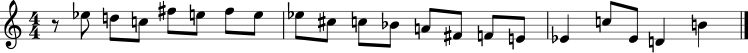

In [6]:
# Taking a melody taken at random from the corpus below, which says. Some notes are repeated, some are unique
# d4 only appears once, where as Eb6, E6 and Eb4 all apear twice. 

#get phrase
melodic_phrase = all_melodies[all_melodies["Number of notes in phrase"] == 20][5:6]



#get phrase label
label = melodic_phrase[['Title', 
           'Performer collection',
           'Measure in which phrase begins',
           'Measure location in which phrase begins']]
label.index = ['Details']

melodic_phrase_render_object = melodic_phrase["Phrase with rhythm render data"].values[0]

#get offset 
start_offset = stream.Stream()
start_offset.append(note.Rest(quarterLength=.5))

display(label.T)

start_offset.append(melodic_phrase_render_object.flat)
start_offset.timeSignature = meter.TimeSignature('4/4')
start_offset = start_offset.flat
start_offset.show()


,Details
Title,My Funny Valentine
Performer collection,Still Live
Measure in which phrase begins,22
Measure location in which phrase begins,3


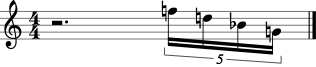

In [7]:

# possible to measure phrase in terms of repetitiion, in this very primitive way, do the same pitches appear again and again

#get phrase
melodic_phrase = all_melodies[all_melodies["Percentage of unique pitches used in phrase"] == 100][100:101]



#get phrase label
label = melodic_phrase[['Title', 
           'Performer collection',
           'Measure in which phrase begins',
           'Measure location in which phrase begins']]
label.index = ['Details']

melodic_phrase_render_object = melodic_phrase["Phrase with rhythm render data"].values[0]

#get offset 
start_offset = stream.Stream()
start_offset.append(note.Rest(quarterLength=3))

display(label.T)

start_offset.append(melodic_phrase_render_object.flat)
start_offset.timeSignature = meter.TimeSignature('4/4')
start_offset = start_offset.flat
start_offset.show()

In [8]:
# Sometimes particular pitches are repeated, other times they are not
# but is it possible, so way define this as a way of understanding repeitition
# 
# we can look across the whole corpus,
# Average and median amount of uniqueness found in all phrases
# possible
# what this says about percentage of unique pitches found in a phrase
# interesting to pose to different questions. What is the sweet spot
# around repetitionQuestion here is in terms of pitches, 88 available notes, when 
# they appear in a prhase, do they repeat?


a = all_melodies["Percentage of unique pitches used in phrase"].mean()
b = all_melodies["Percentage of unique pitches used in phrase"].median()
frame = pd.DataFrame(data=[a,b], index=["Mean percentage of unique pitches used in phrase", 
                                    "Median percentage of unique pitches used in phrase"])
frame

,0
Mean percentage of unique pitches used in phrase,66.175892
Median percentage of unique pitches used in phrase,63.000000


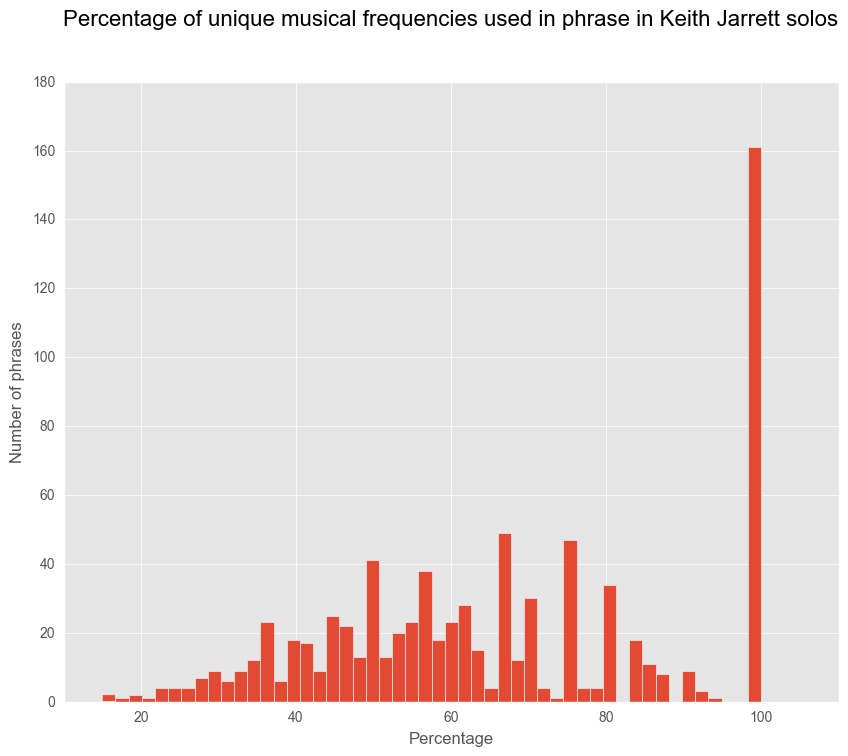

In [9]:
# To visualise this across the corpus, the below figure shows
# histogram. This says, of the [x] phrases, around 160 of them have completely 
# most prases have unique pitches, like the one above. 160 / total_phrases percentage that 
# prhase will be unique
# Average mean and edian comes out here
fig = all_melodies["Percentage of unique pitches used in phrase"].hist(bins=50, figsize=a5_graph_fig_size)
fig.set_title('Percentage of unique musical frequencies used in phrase in Keith Jarrett solos', fontsize=a5_font_size, y=a5_y_label_offset)
fig.set_xlabel('Percentage')
fig.set_ylabel('Number of phrases')


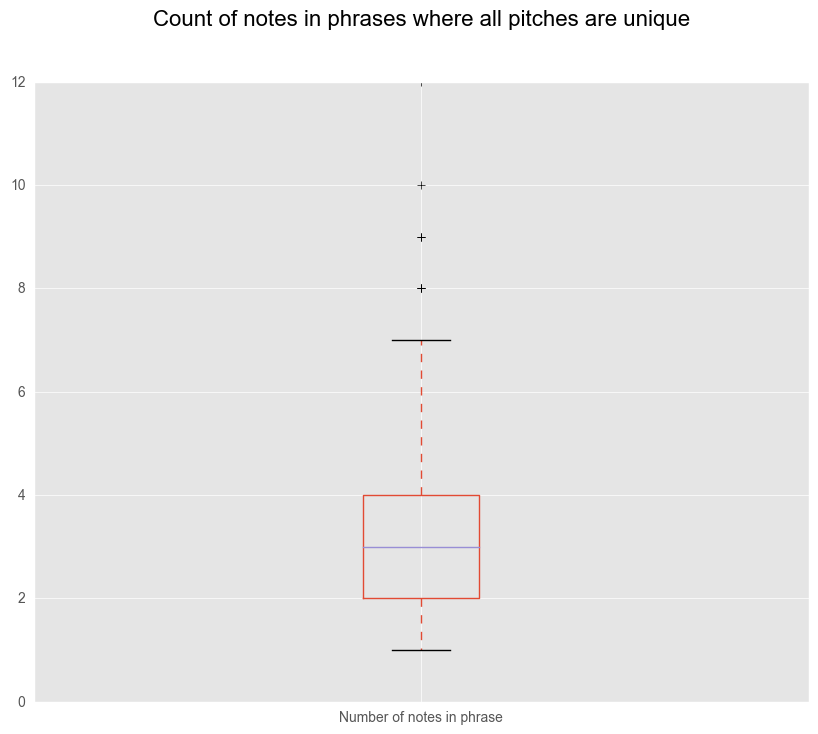

In [10]:
# The length of a phrase seems to be major factor here
# below shows us that across the 160 phrases that have 100% uniqueess in terms of pitchs, they are mostly very short, 
# the median value
# comparison to Miles Davis with short phrases of repeated notes, leaving aside the difference in instrument,
# anecodatlly it seems the case, but this is a test that can be used. 
fig = all_melodies[all_melodies['Percentage of unique pitches used in phrase'] == 100]["Number of notes in phrase"].plot(kind="box", figsize=a5_graph_fig_size)
fig.set_title('Count of notes in phrases where all pitches are unique', fontsize=a5_font_size, y=a5_y_label_offset)
# below provides an alternate and more telling visualisation of this with a box plot, limiting to 
# just unique phrases. The purple line, median, 3 notes, most, and the + shows outliers, atypical

,Details
Title,Autumn Leaves
Performer collection,Still Live
Measure in which phrase begins,96
Measure location in which phrase begins,2


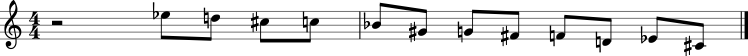

In [11]:
# Its possible to examine some of these outliers. 
# Example of phrase with all unique notes, chosen at random from the corpus

melodic_phrase = all_melodies[(all_melodies['Percentage of unique pitches used in phrase'] == 100) & (all_melodies['Number of notes in phrase'] == 12)]



#get phrase label
label = melodic_phrase[['Title', 
           'Performer collection',
           'Measure in which phrase begins',
           'Measure location in which phrase begins']]
label.index = ['Details']

melodic_phrase_render_object = melodic_phrase["Phrase with rhythm render data"].values[0]

#get offset 
start_offset = stream.Stream()
start_offset.append(note.Rest(quarterLength=2))

display(label.T)

start_offset.append(melodic_phrase_render_object.flat)
start_offset.timeSignature = meter.TimeSignature('4/4')
start_offset = start_offset.flat
start_offset.show()

,Details
Title,My Funny Valentine
Performer collection,Still Live
Measure in which phrase begins,69
Measure location in which phrase begins,0


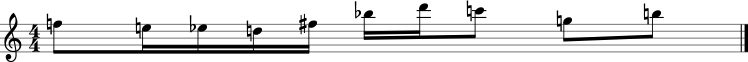

In [12]:
melodic_phrase = all_melodies[(all_melodies['Percentage of unique pitches used in phrase'] == 100) & (all_melodies['Number of notes in phrase'] == 10)][0:1]



#get phrase label
label = melodic_phrase[['Title', 
           'Performer collection',
           'Measure in which phrase begins',
           'Measure location in which phrase begins']]
label.index = ['Details']

melodic_phrase_render_object = melodic_phrase["Phrase with rhythm render data"].values[0]

#get offset 
start_offset = stream.Stream()
#start_offset.append(note.Rest(quarterLength=0))

display(label.T)

start_offset.append(melodic_phrase_render_object.flat)
start_offset.timeSignature = meter.TimeSignature('4/4')
start_offset = start_offset.flat
start_offset.show()

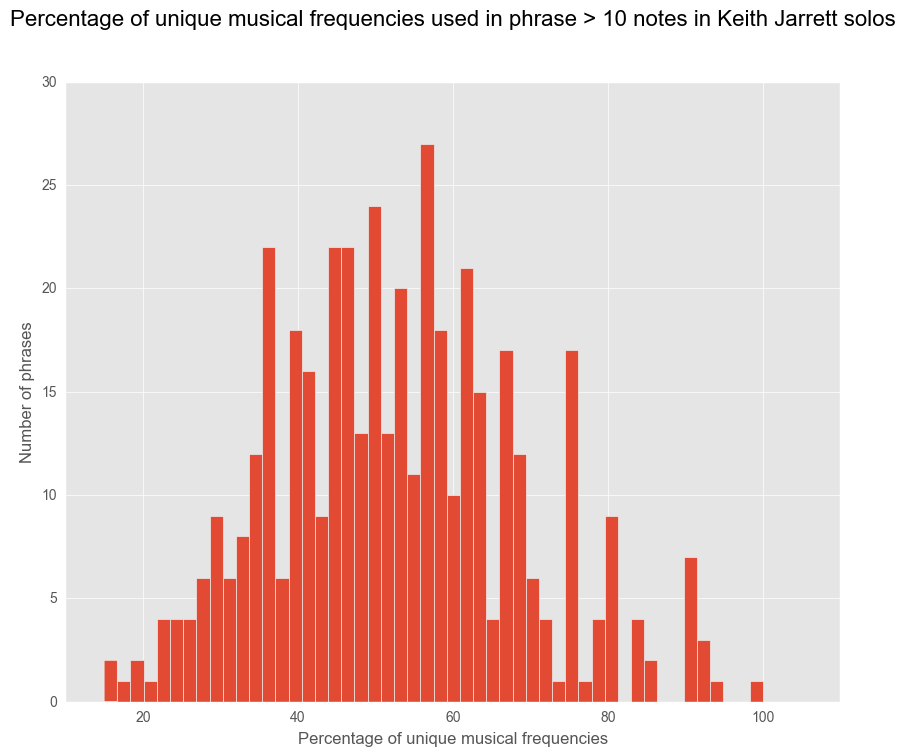

In [13]:
# Leaving outliers aside, it is possible to put the length of phraseLength of phrase seems to be an issue
# a way to move away from this is to only look at phrases above 10 notes. 
# There is a trend here
# not normal, but there is some kind of trend

x = all_melodies[all_melodies['Number of notes in phrase'] > 10]
fig = x["Percentage of unique pitches used in phrase"].hist(bins=50, figsize=(10,8))
fig.set_title('Percentage of unique musical frequencies used in phrase > 10 notes in Keith Jarrett solos',fontsize=16, y=1.08)
fig.set_xlabel('Percentage of unique musical frequencies')
fig.set_ylabel('Number of phrases')

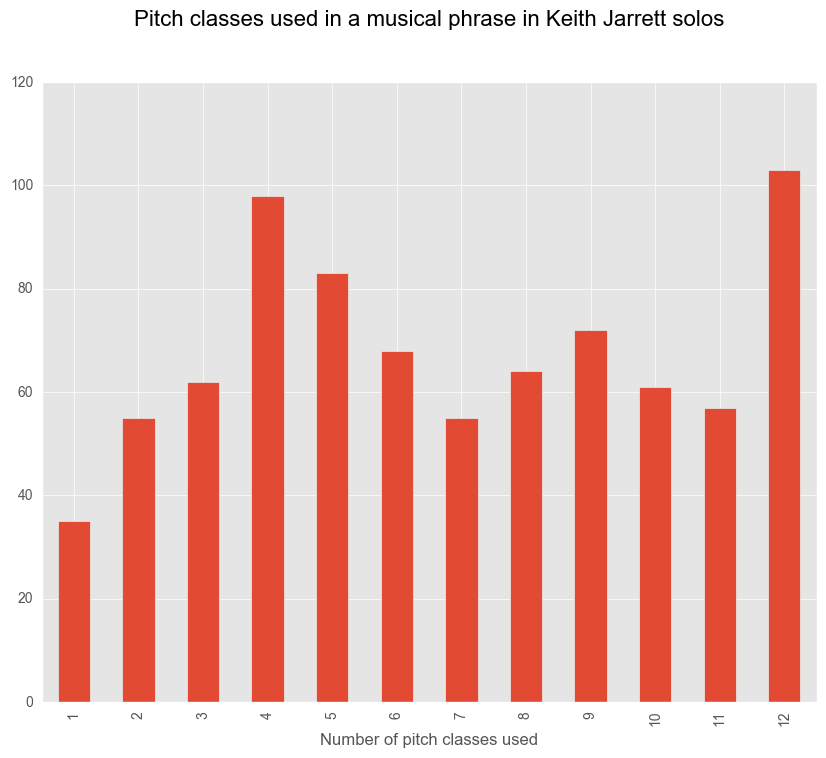

In [14]:
# In music also the issue of pitches, 88, but 
# there are also 12, repetition, again, there is variation, 
# pitch classes
fig = all_melodies.groupby("Number of different pitch classes used in phrase minimized to one octave").count()["Phrase midi numbers"].plot(kind="bar", figsize=(10,8))
fig.set_title('Pitch classes used in a musical phrase in Keith Jarrett solos', fontsize=16, y=1.08)
fig.set_xlabel('Number of pitch classes used')


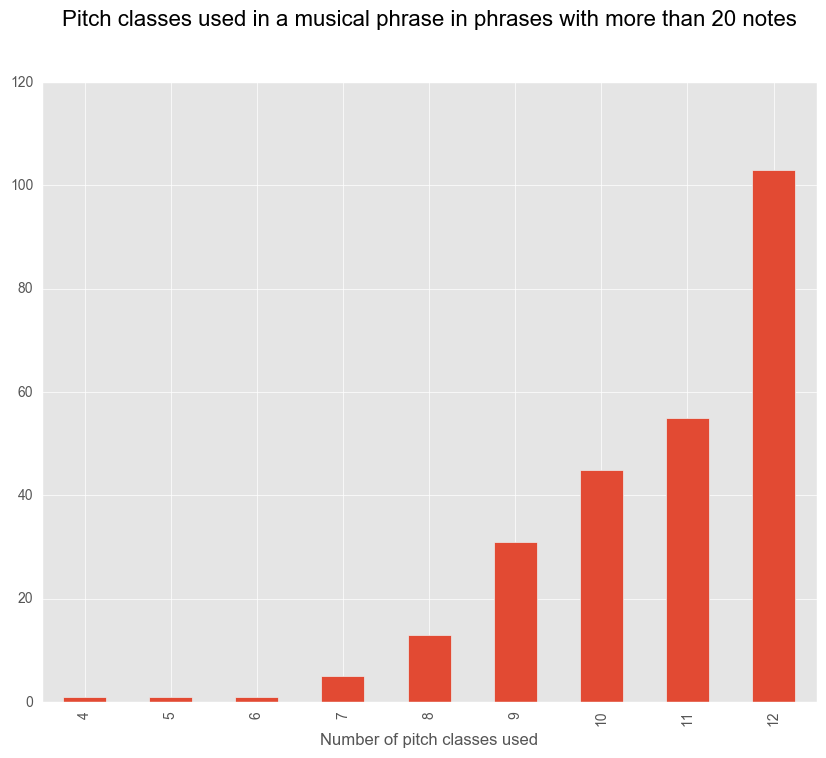

In [15]:
#Assume that the higher number of notes in the melody, the more notes will be used. 
# OVer 20 note melodies use beyond standard scale
# mlodies with more 20 notes tend to use more pitch classes
x = all_melodies[all_melodies['Number of notes in phrase'] > 20]
fig = x.groupby("Number of different pitch classes used in phrase minimized to one octave").count()["Phrase midi numbers"].plot(kind="bar", figsize=(10,8))
fig.set_title('Pitch classes used in a musical phrase in phrases with more than 20 notes',fontsize=16, y=1.08)
fig.set_xlabel('Number of pitch classes used')
#fig.set_ylabel(labels[2])

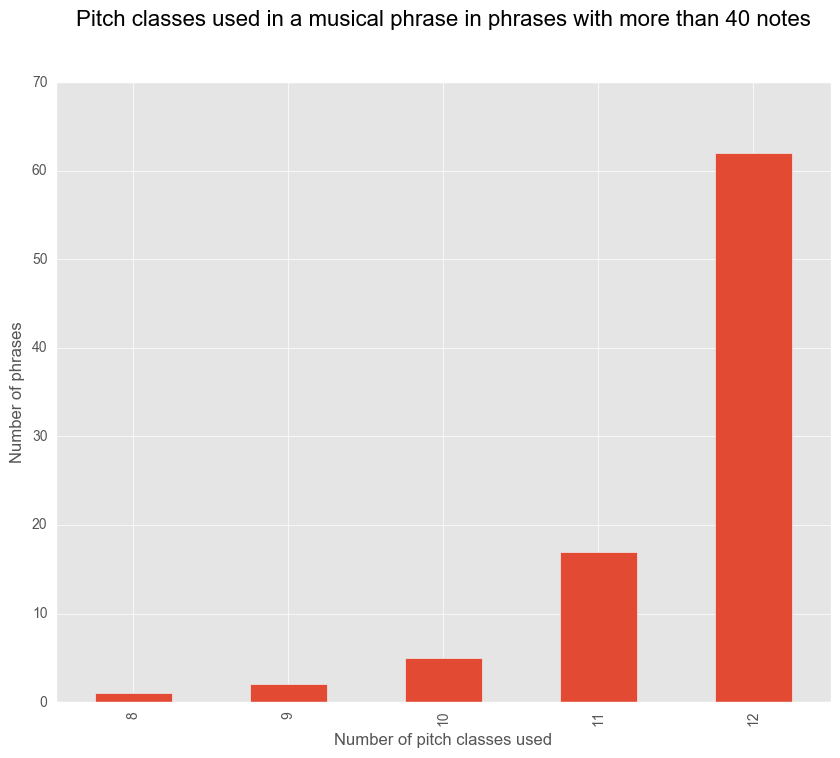

In [16]:
#Assume that the higher number of notes in the melody, the more notes will be used. 
# extend this idea to 40 notes
x = all_melodies[all_melodies['Number of notes in phrase'] > 40]
fig = x.groupby("Number of different pitch classes used in phrase minimized to one octave").count()["Phrase midi numbers"].plot(kind="bar", figsize=(10,8))
fig.set_title('Pitch classes used in a musical phrase in phrases with more than 40 notes', fontsize=16, y=1.08)
fig.set_xlabel('Number of pitch classes used')
fig.set_ylabel("Number of phrases")

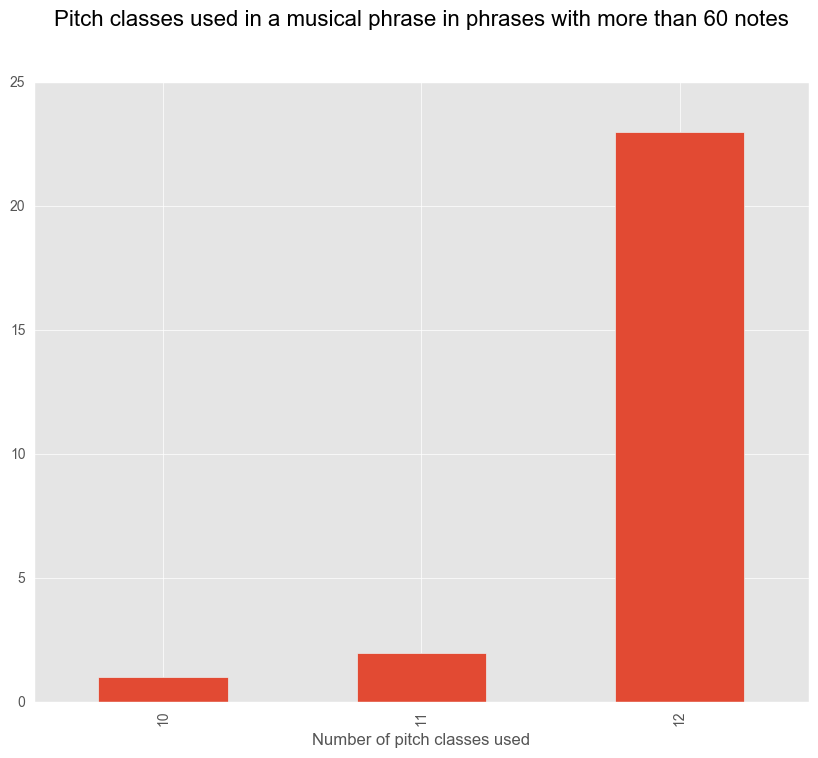

In [17]:
#Suggeststthat jazz melodies use, only 15 of these, but all use all notes of the octave, challenge to notion of 
#Assume that the higher number of notes in the melody, the more notes will be used. 
# OVer 20 note melodies use beyond standard scale
x = all_melodies[all_melodies['Number of notes in phrase'] > 60]
fig = x.groupby("Number of different pitch classes used in phrase minimized to one octave").count()["Phrase midi numbers"].plot(kind="bar", figsize=a5_graph_fig_size)
fig.set_title('Pitch classes used in a musical phrase in phrases with more than 60 notes', fontsize=a5_font_size, y=a5_y_label_offset)
fig.set_xlabel('Number of pitch classes used')
#fig.set_ylabel(labels[2])

In [18]:
a = all_melodies["Percentage of unique durations used in phrase"].mean()
b = all_melodies["Percentage of unique durations used in phrase"].median()
frame = pd.DataFrame(data=[a,b], index=["Mean percentage of unique durations used in phrase", 
                                    "Median percentage of unique durationss used in phrase"])


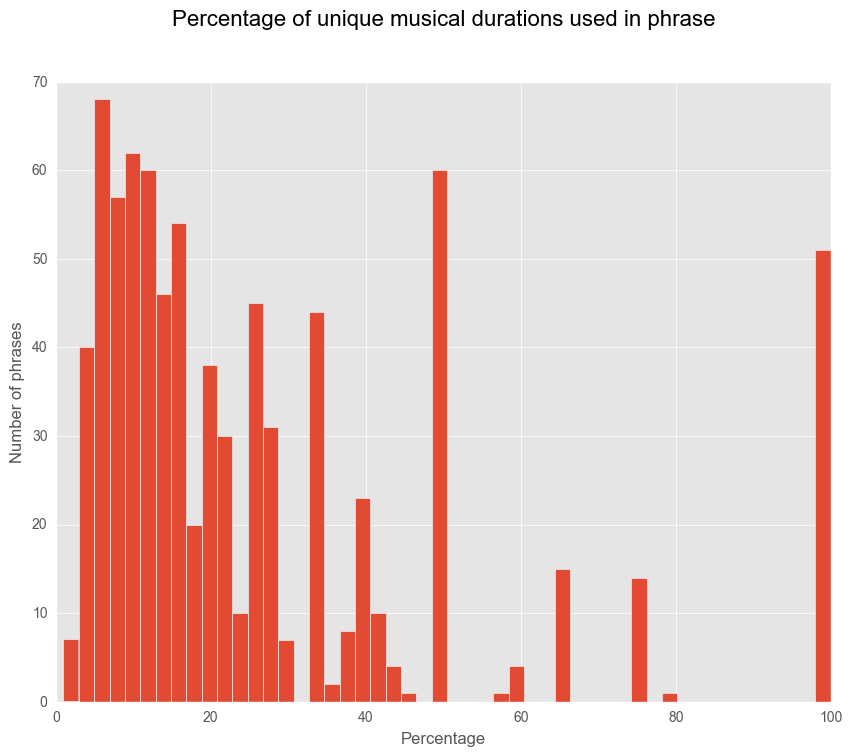

In [19]:
# histogramming the data does not tell us much more, but again that uniform
# more valuable for comparative type data to other musicians

fig = all_melodies["Percentage of unique durations used in phrase"].hist(bins=50, figsize=a5_graph_fig_size)
fig.set_title('Percentage of unique musical durations used in phrase', fontsize=a5_font_size, y = a5_y_label_offset)
fig.set_xlabel('Percentage')
fig.set_ylabel('Number of phrases')

,Details
Title,Days Of Wine And Roses
Performer collection,"Keith Jarrett At The Blue Note, The Complete Recordings (Vol. 3)"
Measure in which phrase begins,43
Measure location in which phrase begins,3.5


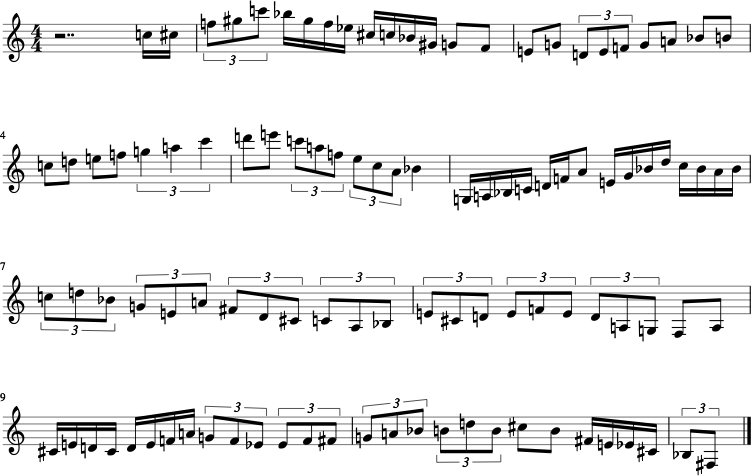

In [20]:
# even in something as complicated as below, 
# things don't seem random - things seem to make sense. 
# there is a sense of balance, but things need to 
# be approached with more nuance to understand this
# at the level of phrase is not granualar enough, 
# and the data shows that Jarrett is able to appear to endlessly variable. 
# but in the next section, we will examine that where there is a structure, why there 
# appears to be sturcutre. 
melodic_phrase = all_melodies[all_melodies['Number of notes in phrase'] > 90][0:1]
#get phrase label
label = melodic_phrase[['Title', 
           'Performer collection',
           'Measure in which phrase begins',
           'Measure location in which phrase begins']]
label.index = ['Details']

melodic_phrase_render_object = melodic_phrase["Phrase with rhythm render data"].values[0]

#get offset 
start_offset = stream.Stream()
start_offset.append(note.Rest(quarterLength=3.5))

display(label.T)

start_offset.append(melodic_phrase_render_object.flat)
start_offset.timeSignature = meter.TimeSignature('4/4')
start_offset = start_offset.flat
start_offset.show()

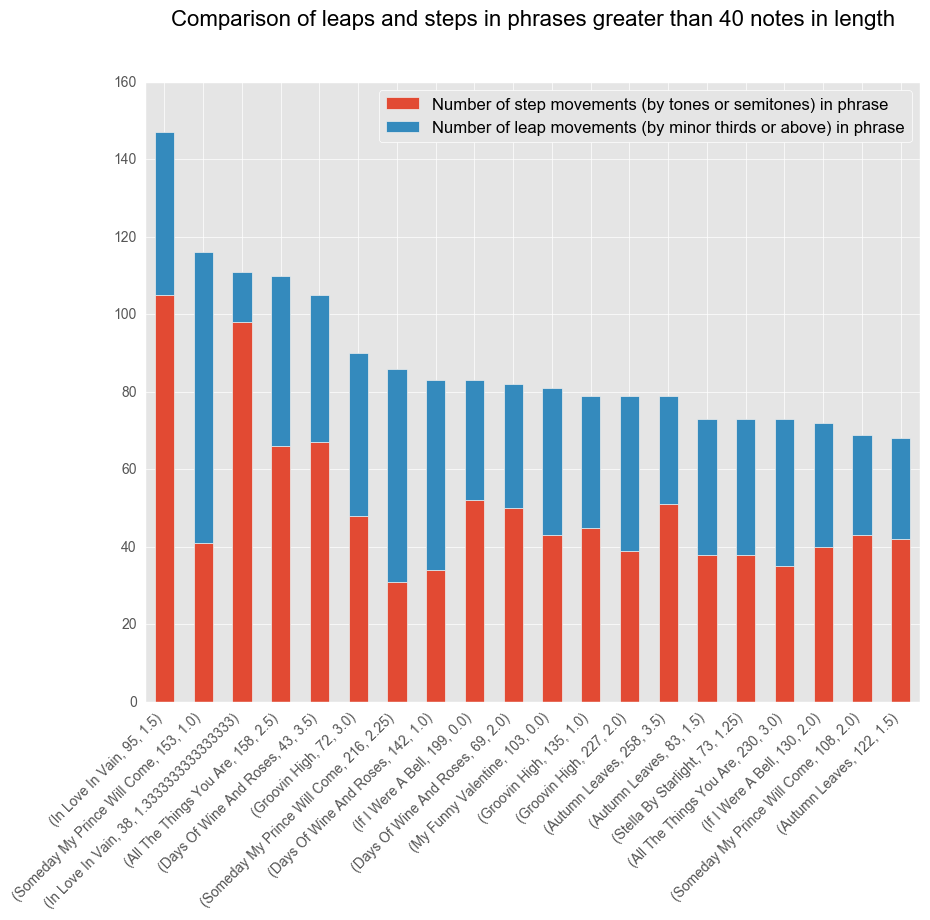

In [21]:
# Some of this lack of randomness can be characterised a the phrase level with characteristics
# Analzing the idea of a phrase phrases in KJ tells us about ways in which variation created, 
# at the level of phrase, difficult to find waht appears to be variation
# supports the thesis that endlessly invientive. In the next section we will move to 
# another way of doing this. 
# Before then, phrase chate, variety moderation,
# balance, of what might be called taste
# this narrative is kept going with the idea of steps and leaps
# there appears to be more leap movements that step movements, but balance
# just the top 20, but what is appearing. 
x = all_melodies[all_melodies['Number of notes in phrase'] > 40]
x = x.sort_values('Number of notes in phrase',ascending = False)
x.index = x[['Title', 'Measure in which phrase begins', 'Measure location in which phrase begins']]
x[['Number of step movements (by tones or semitones) in phrase', 'Number of leap movements (by minor thirds or above) in phrase']][0:20].plot(kind="bar", figsize=a5_graph_fig_size ,stacked=True)
plt.xticks(rotation=45, ha='right')
plt.title("Comparison of leaps and steps in phrases greater than 40 notes in length", fontsize=a5_font_size, y = a5_y_label_offset)



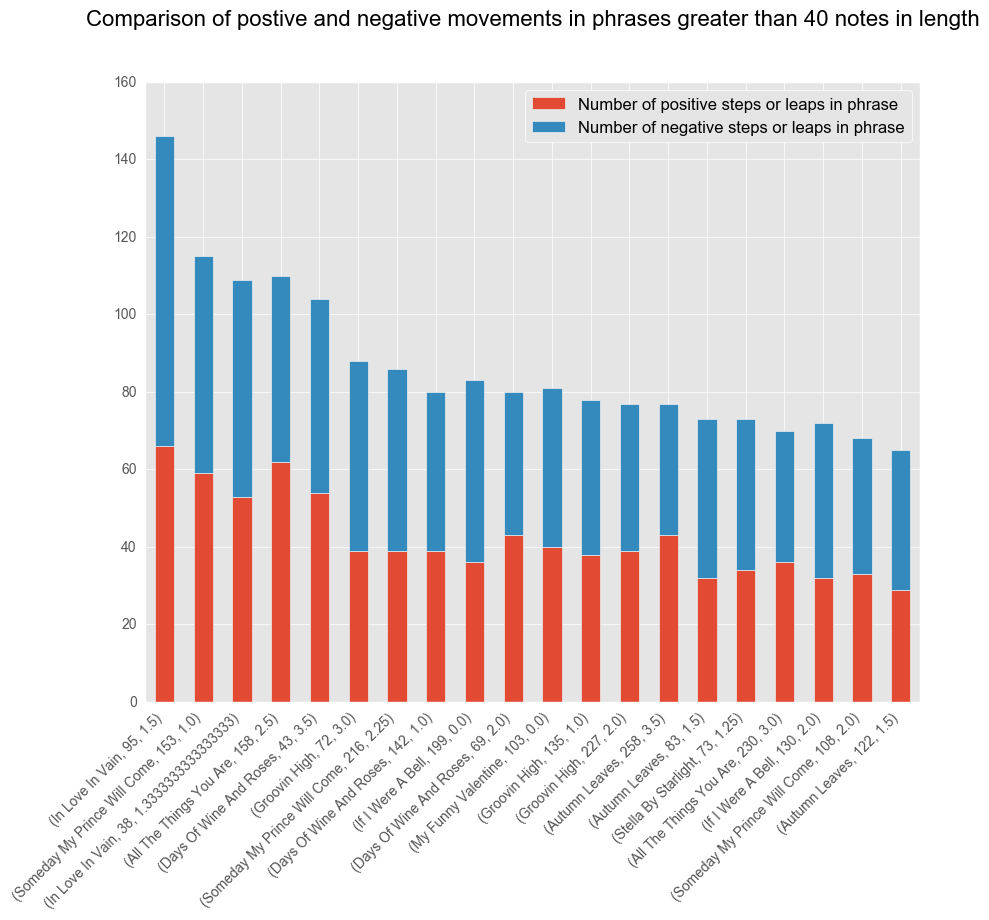

In [22]:
# this leaves the challenge, that intutively, 
# every phrase makes sense, as a jazz musician, logical 
x = all_melodies[all_melodies['Number of notes in phrase'] > 40]
x = x.sort_values('Number of notes in phrase',ascending = False)
x.index = x[['Title', 'Measure in which phrase begins', 'Measure location in which phrase begins']]
x[['Number of positive steps or leaps in phrase', 'Number of negative steps or leaps in phrase']][0:20].plot(kind="bar", figsize=a5_graph_fig_size ,stacked=True)
plt.xticks(rotation=45, ha='right')
plt.title("Comparison of postive and negative movements in phrases greater than 40 notes in length", fontsize=a5_font_size, y = a5_y_label_offset)


In [23]:
a = all_melodies[all_melodies['Number of notes in phrase'] > 10]["Range of phrase in semitones"].mean()
b = all_melodies[all_melodies['Number of notes in phrase'] > 10]["Range of phrase in semitones"].median()
frame = pd.DataFrame(data=[a,b], index=["Mean pitch range used in phrase", 
                                    "Median pitch range used in phrase"])
frame

,0
Mean pitch range used in phrase,17.211845
Median pitch range used in phrase,17.000000


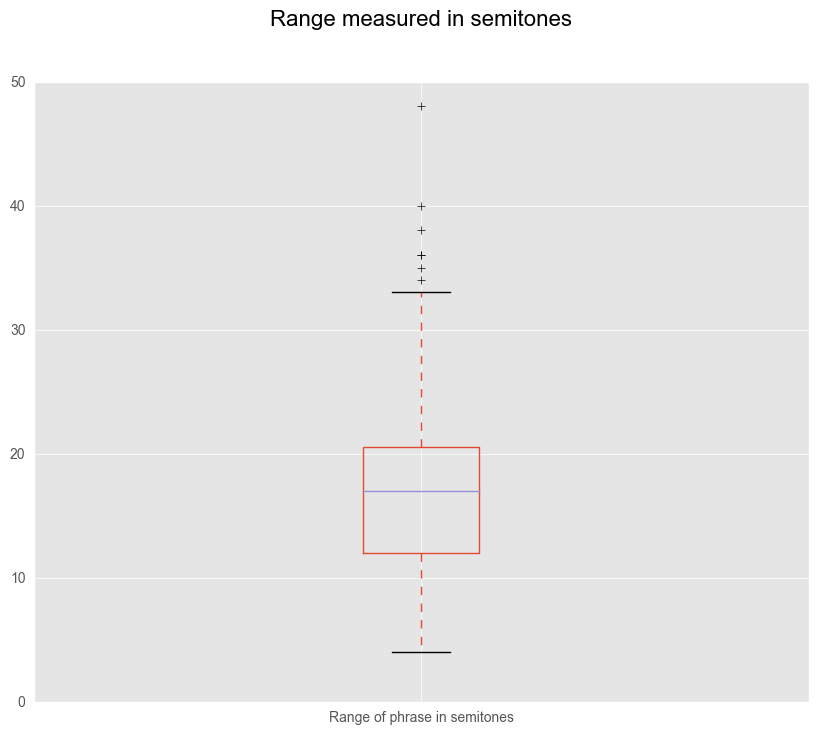

In [24]:
# Range at phrase level, 
# hints that pphrase creation is driven by deep strcutre, is an octave and a half. of the 88 notes that might be used, 
# when a phrase commences, the range will be heavily constricted
# also powerful way to do comparative methods
all_melodies[all_melodies['Number of notes in phrase'] > 10]["Range of phrase in semitones"].plot(kind="box", figsize=a5_graph_fig_size)
plt.title("Range measured in semitones", fontsize=a5_font_size, y = a5_y_label_offset)
